Полное описание проекта с заданиями и файлами изложено в файле README(first_project).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from datetime import date, timedelta
import calendar

In [2]:
#Загружаю данные с CSV файлов, для удобства и понимания какие данные содержатся, я начальные строки и типы колонок.
customers = pd.read_csv('/Users/makbukpro/KC_project/olist_customers_dataset.csv', encoding='windows-1251')

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers.shape

(99441, 5)

In [5]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [6]:
orders = pd.read_csv('/Users/makbukpro/Downloads/KC_csv/olist_orders_dataset.csv', encoding='windows-1251', 
                    parse_dates=['order_purchase_timestamp', 'order_approved_at', 
                                 'order_delivered_carrier_date', 'order_delivered_customer_date', 
                                 'order_estimated_delivery_date'])

In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [8]:
orders.shape

(99441, 8)

In [9]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [10]:
items = pd.read_csv('/Users/makbukpro/Downloads/KC_csv/olist_order_items_dataset.csv', encoding='windows-1251',
                       parse_dates = ['shipping_limit_date'])

In [11]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
items.shape

(112650, 7)

In [13]:
items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

# 1. Сколько пользователей, которые совершили покупку только один раз?

In [14]:
#Поскольку нас интересуют  только те клиенты, которые имеют по 1 заказу, нам достаточно прямого джоина таблиц. 
customers_orders = customers.merge(orders, how = 'inner', on = 'customer_id')

In [15]:
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [16]:
#Посмотрим сколько у нас заказов по статусам
customers_orders.groupby('order_status', as_index = False) \
    .agg({'customer_unique_id':'count'}) \
    .rename(columns = {'customer_unique_id':'custs_cnt'})

,order_status,custs_cnt
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [17]:
# Не буду учитывать заказы со статусами 'canceled', 'unavailable'
customers_orders = customers_orders.query("order_status not in ('canceled', 'unavailable')") \
    .groupby(['customer_unique_id'], as_index = False) \
    .agg({'order_id':'count'}) \
    .rename(columns = {'order_id': 'orders_cnt'})

In [18]:
customers_orders.query('orders_cnt == 1')['orders_cnt'].value_counts()

1    92102
Name: orders_cnt, dtype: int64

In [19]:
# Ответ: 92102 пользователей

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [20]:
#отбираю заказы со всеми статусами, кроме delivered
status = ['delivered']
no_delivered_orders = orders.query('order_status != @status')

In [21]:
no_delivered_orders['last_state_time'] = (
    no_delivered_orders['order_delivered_customer_date'].combine_first(no_delivered_orders['order_delivered_carrier_date'])
        .combine_first(no_delivered_orders['order_approved_at'])
        .combine_first(no_delivered_orders['order_purchase_timestamp'])
)

/Users/makbukpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
#Проверяем что у нас не осталось пустых значений в столбце last_state_time 
no_delivered_orders.last_state_time.isna().sum()

0

In [23]:
no_delivered_orders['last_state_month'] = no_delivered_orders.last_state_time.dt.year*100 + no_delivered_orders.last_state_time.dt.month

/Users/makbukpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
nd_order = no_delivered_orders.groupby(['order_status', 'last_state_month'], as_index = False) \
        .agg({'order_id':'count'}) \
        .rename(columns = {'order_id': 'cnt'})

In [25]:
nd_order.groupby('order_status', as_index =False) \
        .agg({'cnt':'mean'}) \
        .rename(columns = {'cnt':'mean_cnt'}) \
        .sort_values('mean_cnt', ascending = False)

,order_status,mean_cnt
5,shipped,48.130435
6,unavailable,29.000000
1,canceled,26.041667
4,processing,15.842105
3,invoiced,14.952381
2,created,1.666667
0,approved,1.000000


# 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [26]:
items_x_order = items.merge(orders, how = 'left', on = 'order_id').sort_values('order_id')
items_x_order = items_x_order[['product_id', 'order_id', 'order_purchase_timestamp']]
items_x_order['day_name'] = items_x_order.order_purchase_timestamp.dt.day_name()

In [27]:
items_x_order.head()

,product_id,order_id,order_purchase_timestamp,day_name
0,4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,Wednesday
1,e5f2d52b802189ee658865ca93d83a8f,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,Wednesday
2,c777355d18b72b67abbeef9df44fd0fd,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,Sunday
3,7634da152a4610f1595efa32f14722fc,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,Wednesday
4,ac6c3623068f30de03045865e4e10089,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,Saturday


In [28]:
product_x_day = items_x_order.groupby(['product_id', 'day_name'], as_index = False) \
        .agg({'order_id':'count'}) \
        .sort_values('product_id')

In [29]:
max_orders = product_x_day.groupby(['product_id'], as_index =False) \
        .agg({'order_id':'max'}) \
        .rename(columns = {'order_id':'max_cnt'})

In [30]:
product_x_day = product_x_day.merge(max_orders, how = 'left', on = 'product_id')

In [31]:
product_x_day.query('order_id == max_cnt')[['product_id', 'day_name', 'max_cnt']].head(10)

,product_id,day_name,max_cnt
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1
5,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
6,0011c512eb256aa0dbbb544d8dffcf6e,Thursday,1
7,00126f27c813603687e6ce486d909d01,Sunday,2
12,001795ec6f1b187d37335e1c4704762e,Saturday,3
13,001b237c0e9bb435f2e54071129237e9,Thursday,1


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [32]:
cust_x_order = customers.merge(orders, how = 'inner', on = 'customer_id')

In [33]:
cust_x_order = cust_x_order[['customer_unique_id', 'order_id', 'order_purchase_timestamp']]
cust_x_order['create_month'] = cust_x_order.order_purchase_timestamp.dt.year * 100 + cust_x_order.order_purchase_timestamp.dt.month
cust_x_order['days_in_month'] = cust_x_order.order_purchase_timestamp.dt.days_in_month
cust_x_order['mean_days_in_week'] = (cust_x_order.days_in_month/7).round(2)

In [34]:
cust_x_order.head()

,customer_unique_id,order_id,order_purchase_timestamp,create_month,days_in_month,mean_days_in_week
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,201705,31,4.43
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,201801,31,4.43
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,201805,31,4.43
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,201803,31,4.43
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,201807,31,4.43


In [35]:
cust_x_order = cust_x_order.groupby(['customer_unique_id','create_month', 'mean_days_in_week'], as_index = False) \
        .agg({'order_id':'count'}) \
        .rename(columns = {'order_id':'orders_cnt'})

In [36]:
cust_x_order['mean_orders_in_month'] = (cust_x_order.orders_cnt/cust_x_order.mean_days_in_week).round(2)

In [37]:
#финальный результат, вывожу только первые 10 товаров отсортированные по среднему колөву покупок в неделю
cust_x_order.sort_values('mean_orders_in_month', ascending = False).head(10)

,customer_unique_id,create_month,mean_days_in_week,orders_cnt,mean_orders_in_month
7325,12f5d6e1cbf93dafd9dcc19095df0b3d,201701,4.43,6,1.35
23943,3e43e6105506432c953e165fb2acf44c,201802,4.00,4,1.00
69396,b4e4f24de1e8725b74e4a1f4975116ed,201802,4.00,4,1.00
62196,a239b8e2fbce33780f1f1912e2ee5275,201702,4.00,4,1.00
67755,b08fab27d47a1eb6deda07bfd965ad43,201709,4.29,4,0.93
14489,25a560b9a6006157838aab1bdbd68624,201704,4.29,4,0.93
50622,83e7958a94bd7f74a9414d8782f87628,201701,4.43,4,0.90
76793,c8460e4251689ba205045f3ea17884a1,201808,4.43,4,0.90
81183,d3882d7abd0c66064d740d7ed04dd1ef,201802,4.00,3,0.75
68583,b2bd387fdc3cf05931f0f897d607dc88,201802,4.00,3,0.75


# 5. Необходимо написать функцию на python, позволяющую строить когортный анализ. В период с января по декабрь выявить когорту с самым высоким retention на 3-й месяц.

In [38]:
cust_x_order5 = customers.merge(orders, how = 'inner', on = 'customer_id')
cust_x_order5 = cust_x_order5[['customer_unique_id', 'order_purchase_timestamp', 'order_id']]

In [39]:
cust_x_order5.head()

,customer_unique_id,order_purchase_timestamp,order_id
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,00e7ee1b050b8499577073aeb2a297a1
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,29150127e6685892b6eab3eec79f59c7
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,b2059ed67ce144a36e2aa97d2c9e9ad2
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,951670f92359f4fe4a63112aa7306eba
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,6b7d50bd145f6fc7f33cebabd7e49d0f


In [40]:
#Функция, которая возвращает начало месяца от даты
def month_begin(x):
    x = pd.Timestamp(year=x.year, month=x.month, day=1)
    return x

In [41]:
#функция считают разницу между двумя датами в месяцах
def timedelta_ym(x, y):
    if x.year == y.year:
        z = y.month - x.month
    else:
        z = (y.year - x.year)*12 + (y.month - x.month)
    return z

In [42]:
#формирую глобальный датафрэйм куда сохраню результат когортного анализа
cohort_table = pd.DataFrame()

In [43]:
#пропустив первый раз данные через функцию и построив когортный анализ, решила отфильтровать данные , оставив только за 2017г.
#поскольку только по этому году имеем полные данные с января по декабрь
cust_x_order5 = cust_x_order5.query("order_purchase_timestamp >= '2017-01-01 00:00:00' and order_purchase_timestamp < '2018-01-01 00:00:00'")

Для функции, которая считает когортный анализ, необходимо на вход давать датафрэйм с 3 столбцами:
customer_unique_id, order_purchase_timestamp и order_id

В качестве результата:
1) возвращает когортный анализ во входной датафрэм
2) сохраняет промежуточный результат в глобальную переменную cohort_table для дальней работы
3) строит график

In [44]:
cust_x_order5.head()

,customer_unique_id,order_purchase_timestamp,order_id
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,00e7ee1b050b8499577073aeb2a297a1
5,4c93744516667ad3b8f1fb645a3116a4,2017-09-14 18:14:31,5741ea1f91b5fbab2bd2dc653a5b5099
7,57b2a98a409812fe9618067b6b8ebe4f,2017-11-16 19:29:02,1093c8304c7a003280dd34598194913d
10,2a7745e1ed516b289ed9b29c7d0539a5,2017-11-27 17:23:20,8428e578bb1cf839ae26a6b7615502b9
12,918dc87cd72cd9f6ed4bd442ed785235,2017-09-09 09:54:57,83d8f70418eefd96f37b483dff430305


In [45]:
def cohort_analysis(x):
    #добавляю колонку месяц совершения заказа, функция month_begin описана выше
    x['order_create_month'] = x.order_purchase_timestamp.apply(month_begin)
    #нахожу месяц первого заказа у каждого клиента, в дальнейшем это поле у нас будет когортой
    cust_x_first_order = x.groupby('customer_unique_id')['order_create_month'].agg({'cohort': 'min'}).reset_index()
    x = x.merge(cust_x_first_order, how = 'inner', on = 'customer_unique_id')
    #формирую датафрэйм с группировкой по когортам и последующим месяцам заказов
    df_cohort = x.groupby(['cohort', 'order_create_month'], as_index = False) \
    .agg({'customer_unique_id':'nunique'}).rename(columns = {'customer_unique_id':'custs_cnt'} )
    #считаю разницу в месяцах между когортой и месяцем заказа, функция timedelta_ym описана выше
    df_cohort['period_number'] = df_cohort.apply(lambda x: timedelta_ym(x['cohort'], x['order_create_month']), axis = 1)
    #изменяю формат когорты в виде год-месяц для удобного отображения на графике
    df_cohort['cohort'] = df_cohort['cohort'].dt.to_period('M')
    #сохраняю промежуточный вариант анализа, понадобиться для нахождения максимального значения retention на 3 месяц
    cohort_table = df_cohort.copy()
    #транспонирую датафрэйм для отображения в привычном виде
    df_cohort = df_cohort.pivot(index = 'cohort', columns = 'period_number', values = 'custs_cnt')
    cohort_size = df_cohort.iloc[:,0]
    df_cohort = df_cohort.divide(cohort_size, axis = 0) 
    x = df_cohort
    with sns.axes_style("white"):
        fig, ax = plt.subplots(1, 2, figsize=(18, 10), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

        # cohort size
        cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
        white_cmap = mcolors.ListedColormap(['white'])
        sns.heatmap(cohort_size_df, 
                    annot=True, 
                    cbar=False, 
                    fmt='g', 
                    cmap=white_cmap, 
                    ax=ax[0])

        # retention matrix
        sns.heatmap(df_cohort, 
                    mask=df_cohort.isnull(), 
                    annot=True, 
                    fmt='.2%', 
                    cmap='RdYlGn', 
                    ax=ax[1])
        ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
        ax[1].set(xlabel='# of periods',
                  ylabel='')

        fig.tight_layout()
    return x, cohort_table

/Users/makbukpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


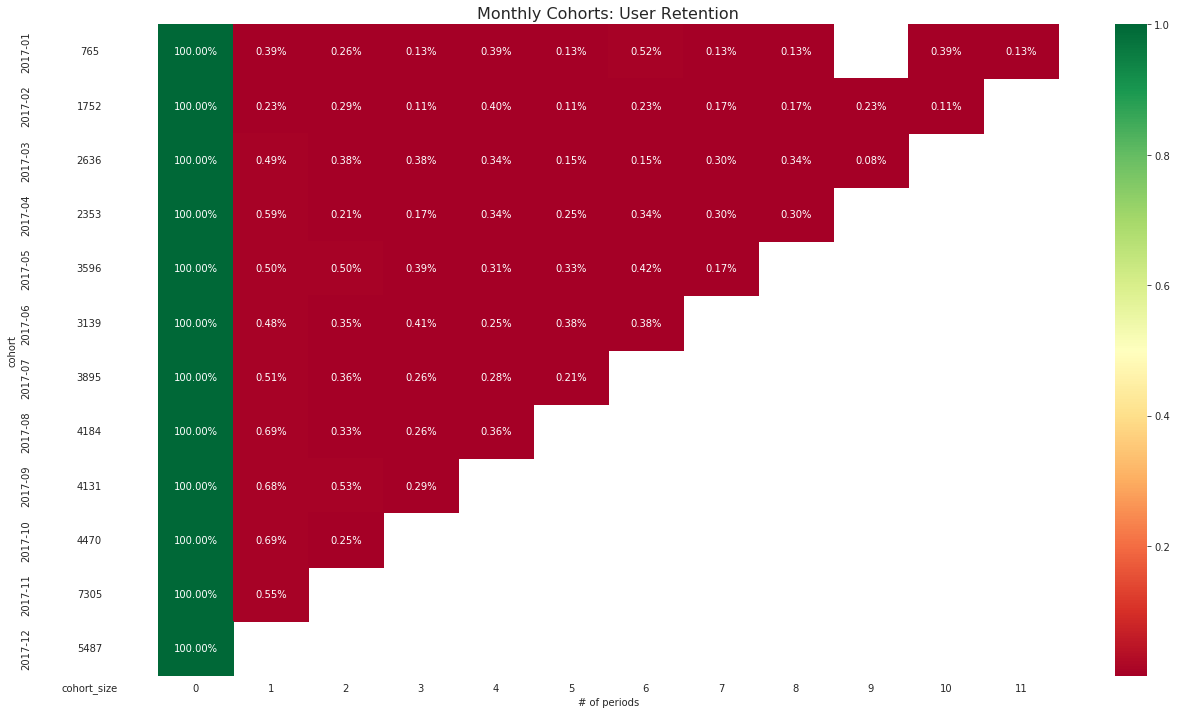

In [46]:
cust_x_order5, cohort_table = cohort_analysis(cust_x_order5)

In [47]:
cust_x_order5

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-01,1.0,0.003922,0.002614,0.001307,0.003922,0.001307,0.005229,0.001307,0.001307,NaN,0.003922,0.001307
2017-02,1.0,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142,NaN
2017-03,1.0,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759,NaN,NaN
2017-04,1.0,0.005950,0.002125,0.001700,0.003400,0.002550,0.003400,0.002975,0.002975,NaN,NaN,NaN
2017-05,1.0,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669,NaN,NaN,NaN,NaN
2017-06,1.0,0.004779,0.003504,0.004141,0.002549,0.003823,0.003823,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.005135,0.003594,0.002567,0.002824,0.002054,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006931,0.003346,0.002629,0.003585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006778,0.005326,0.002905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
cohort_table.head()

,cohort,order_create_month,custs_cnt,period_number
0,2017-01,2017-01-01,765,0
1,2017-01,2017-02-01,3,1
2,2017-01,2017-03-01,2,2
3,2017-01,2017-04-01,1,3
4,2017-01,2017-05-01,3,4


In [49]:
df_cohort0 = cohort_table.query('period_number == 0')[['cohort', 'custs_cnt']].rename(columns = {'custs_cnt':'all_custs'})
df_cohort3 = cohort_table.query('period_number == 3')

In [50]:
df_cohort3 = df_cohort3.merge(df_cohort0, how = 'inner', on = 'cohort')

In [51]:
df_cohort3['retention'] = df_cohort3.custs_cnt / df_cohort3.all_custs * 100

In [52]:
cohort3_max = df_cohort3.retention.max()

In [53]:
df_cohort3.query("retention == @cohort3_max") 

,cohort,order_create_month,custs_cnt,period_number,all_custs,retention
5,2017-06,2017-09-01,13,3,3139,0.414145


# 6. Построй RFM-кластеры для пользователей. Выведи для каждого кластера средние значения метрик R, F, M (R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время.)

Для метрики Monetary необходимо посчитать стоимость всего заказа, а перед этим посчитать кол-во товаров в заказе
В датафрэйме product_cnt считаю кол-во каждого продукта в заказе

In [54]:
product_cnt = items.groupby(['order_id', 'product_id', 'price'], as_index = False) \
        .agg({'order_item_id':'count'}).rename(columns={'order_item_id':'prod_cnt'})
# в колонку prod_cost добавляет стоимость товара (кол-во * цена за единицу товара)
product_cnt['prod_cost'] = product_cnt.price*product_cnt.prod_cnt

In [55]:
#считаю стоимость заказов
orders_cost =  product_cnt.groupby('order_id', as_index = False) \
    .agg({'prod_cost':'sum'}).rename(columns = {'prod_cost':'order_cost'})

In [56]:
#формирую датафрэм клиентов и заказов
cust_x_order6 = customers.merge(orders, how = 'inner', on = 'customer_id')
cust_x_order6 = cust_x_order6[['order_purchase_timestamp', 'customer_unique_id', 'order_id']]

In [57]:
#добавляю к каждому заказу его стоимость, посчитанную ранее
cust_x_order6 = cust_x_order6.merge(orders_cost, how = 'inner', on = 'order_id')[['order_purchase_timestamp', 'customer_unique_id',  'order_cost']]

In [58]:
#тк данные не свежие, решила считать кол-во прошедних дней не от текущей даты, а от максимальной даты в датафрэйме +1
last_date = cust_x_order6['order_purchase_timestamp'].max() + timedelta(days=1)

In [59]:
cust_x_order6['date_diff'] = (last_date - cust_x_order6.order_purchase_timestamp).dt.days

In [60]:
cust_x_order6.head()

,order_purchase_timestamp,customer_unique_id,order_cost,date_diff
0,2017-05-16 15:05:35,861eff4711a542e4b93843c6dd7febb0,124.99,475
1,2018-01-12 20:48:24,290c77bc529b7ac935b93aa66c333dc3,289.00,234
2,2018-05-19 16:07:45,060e732b5b29e8181a18229c7b0b2b5e,139.94,107
3,2018-03-13 16:06:38,259dac757896d24d7702b9acbbff3f3c,149.94,174
4,2018-07-29 09:51:30,345ecd01c38d18a9036ed96c73b8d066,230.00,36


In [61]:
preprocess = cust_x_order6.groupby(['customer_unique_id', 'date_diff'], as_index = False) \
        .agg({'order_purchase_timestamp':'count', 'order_cost':'sum'}) \
        .rename(columns = {'date_diff':'Recency', 'order_purchase_timestamp':'Frequency', 'order_cost':'Monetary'})

In [62]:
preprocess.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


In [63]:
preprocess.describe()

,Recency,Frequency,Monetary
count,97732.000000,97732.000000,97732.000000
mean,245.234683,1.009557,139.070557
std,153.345113,0.101511,212.885315
min,1.000000,1.000000,0.850000
25%,121.000000,1.000000,46.000000
50%,226.000000,1.000000,88.500000
75%,355.000000,1.000000,149.990000
max,729.000000,6.000000,13440.000000


In [64]:
#по частате покупок у нас получается, что преобладают единичные покупки. Запрос ниже показывает, разбиение по кол-ву покупок
preprocess.groupby('Frequency', as_index = False) \
    .agg({'customer_unique_id':'count'})

,Frequency,customer_unique_id
0,1,96832
1,2,870
2,3,28
3,4,1
4,6,1


/Users/makbukpro/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/makbukpro/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/makbukpro/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

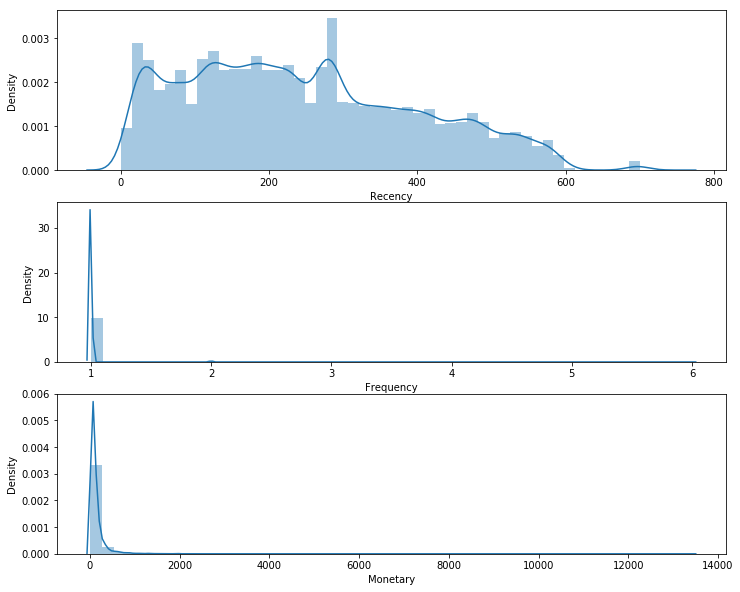

In [65]:
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(preprocess['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(preprocess['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(preprocess['Monetary'])
# Show the plot
plt.show()

In [66]:
#Делю значения Recency и Monetary по 33 и 66 перцентилю, для Frequency такое разбиение посчитала не целесообразным, 
#иначе в 1 и 2 кластерах будут покупки с частотой 1
quantiles = preprocess.quantile(q=[0.33, 0.66])
quantiles

,Recency,Frequency,Monetary
0.33,154.0,1.0,56.99
0.66,294.0,1.0,120.90


Границы метрик RFM-сегментов:
    1         2              3
R: 0-154   155-294        295-729
F: 0-1        2             3-6
M: 0-56.99  57-120.90  120.91-13440

In [67]:
quantiles = quantiles.to_dict()
quantiles['Frequency'][0.66] = 2.0
segmented_rfm = preprocess

def RScore(x,p,d):
    if x <= d[p][0.33]:
        return 1
    elif x <= d[p][0.66]:
        return 2
    else:
        return 3

segmented_rfm['r_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['Frequency'].apply(RScore, args=('Frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['Monetary'].apply(RScore, args=('Monetary',quantiles,))
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)

In [68]:
quantiles

{'Recency': {0.33: 154.0, 0.66: 294.0},
 'Frequency': {0.33: 1.0, 0.66: 2.0},
 'Monetary': {0.33: 56.99, 0.66: 120.9}}

In [69]:
#для каждего кластера считаю средние значения метрик R, F, M
segmented_rfm.groupby('RFMScore', as_index = False) \
    .agg({'Recency':'mean', 'Frequency':'mean', 'Monetary':'mean'}) \
    .round(2) \
    .rename(columns = {'Recency':'Recency_mean', 'Frequency':'Frequency_mean', 'Monetary':'MonetaryValue_mean'})

,RFMScore,Recency_mean,Frequency_mean,MonetaryValue_mean
0,111,80.02,1.00,34.43
1,112,81.93,1.00,87.92
2,113,82.39,1.00,295.07
3,121,81.62,2.00,39.59
4,122,87.28,2.00,89.45
5,123,77.25,2.00,379.82
6,132,94.00,3.00,76.47
7,133,118.50,3.00,245.00
8,211,224.92,1.00,34.52
9,212,226.80,1.00,87.24
